In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import matplotlib.image as image
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read Image

im = Image.open('CAPTAIN ROHIT SHARMA.jpg')

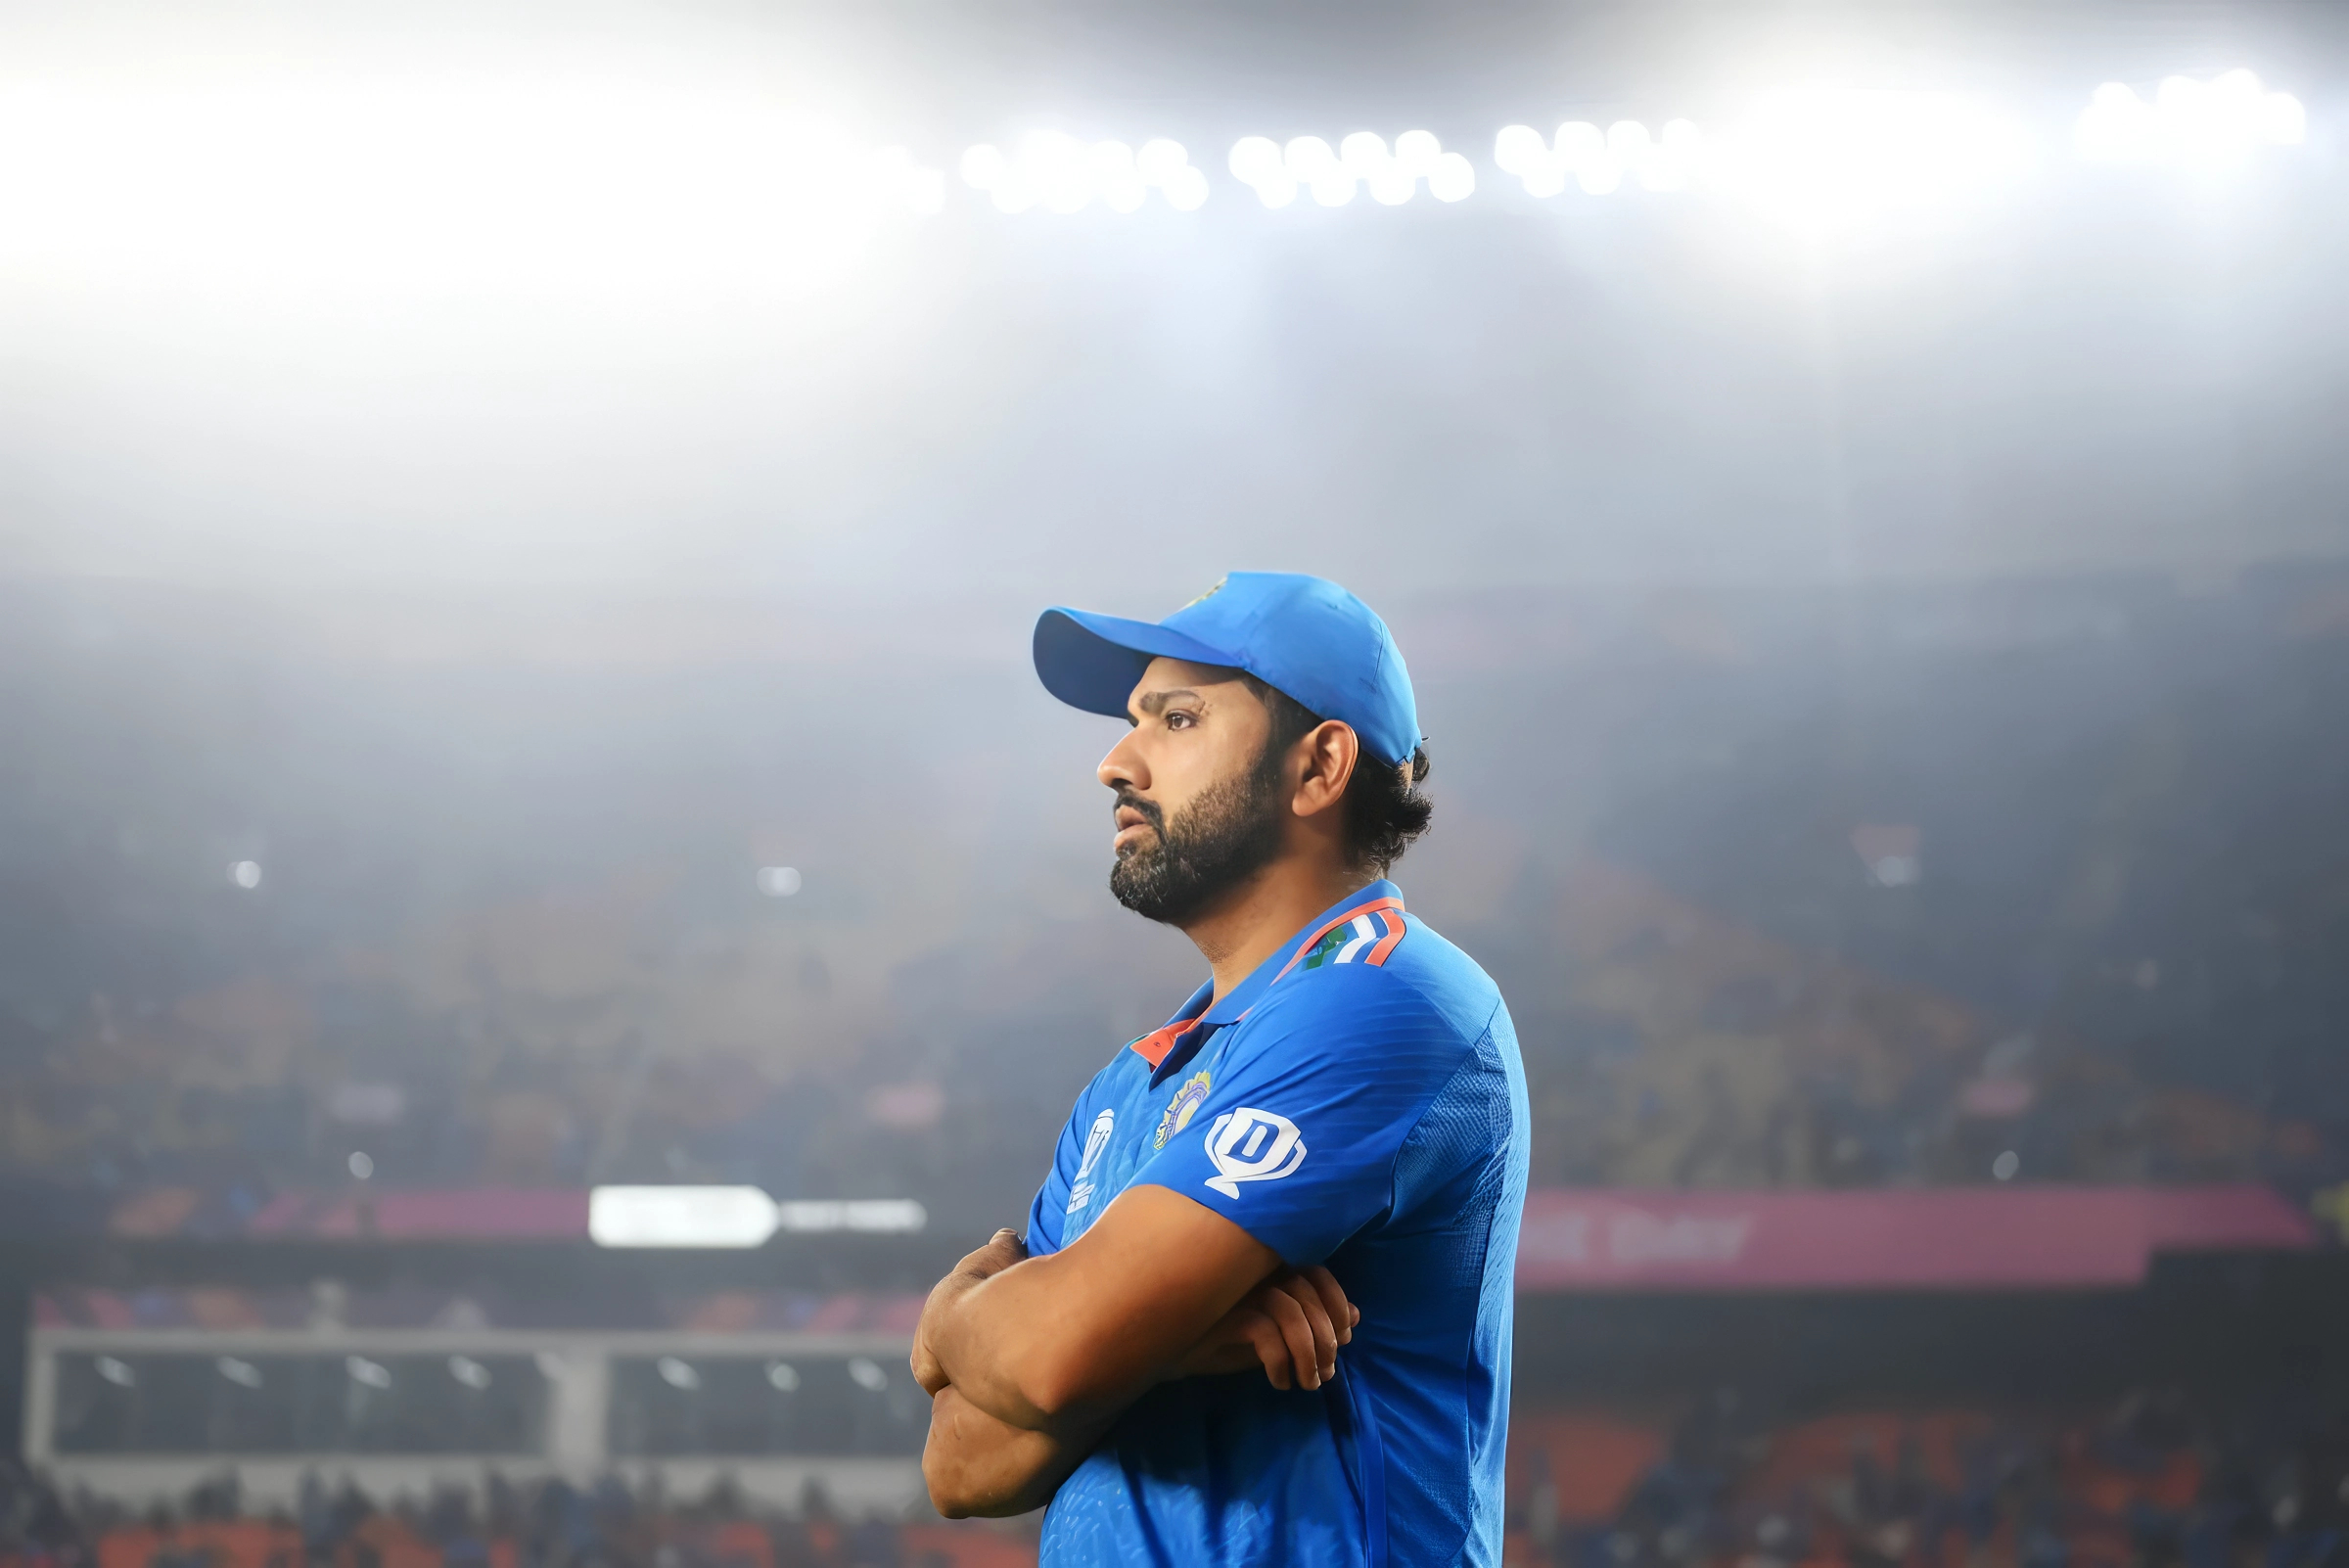

In [8]:
im

In [9]:
im_arr = np.array(im)

In [10]:
im_arr

array([[[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [144, 150, 162],
        [144, 150, 162],
        [144, 150, 162]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [143, 149, 161],
        [143, 149, 161],
        [143, 149, 161]],

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [144, 150, 162],
        [144, 150, 162],
        [144, 150, 162]],

       ...,

       [[ 88,  63,  67],
        [ 89,  64,  70],
        [ 85,  63,  65],
        ...,
        [ 40,  43,  48],
        [ 40,  43,  48],
        [ 40,  43,  48]],

       [[ 90,  63,  68],
        [ 90,  63,  68],
        [ 90,  63,  68],
        ...,
        [ 41,  44,  53],
        [ 41,  44,  49],
        [ 41,  44,  51]],

       [[ 90,  63,  68],
        [ 90,  63,  68],
        [ 90,  63,  68],
        ...,
        [ 41,  44,  53],
        [ 41,  44,  49],
        [ 41,  44,  49]]

In [12]:
im_arr.shape

(1602, 2400, 3)

In [13]:
im_arr.size

11534400

In [14]:
pixels = im_arr.reshape([1602 * 2400, 3])

In [15]:
pixels

array([[240, 240, 240],
       [240, 240, 240],
       [240, 240, 240],
       ...,
       [ 41,  44,  53],
       [ 41,  44,  49],
       [ 41,  44,  49]], dtype=uint8)

In [16]:
pixels.shape

(3844800, 3)

In [17]:
from sklearn.cluster import KMeans

In [54]:
KM = KMeans(n_clusters= 7, max_iter= 10000)

In [55]:
KM.fit(pixels)

KMeans(max_iter=10000, n_clusters=7)

In [56]:
KM.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [57]:
KM.labels_.shape

(3844800,)

In [58]:
pixels.shape

(3844800, 3)

In [59]:
# Determine "Centroid" of each cluster

pixels_points = KM.labels_                  # Labels of all 3844800 rows
cluster_center = KM.cluster_centers_        # Center of each cluster.

In [60]:
cluster_center

array([[243.12506359, 245.22291187, 246.93208439],
       [125.6105543 , 125.74196416, 133.34124666],
       [160.70428183, 164.08936535, 171.7280409 ],
       [ 57.50208578, 126.80288762, 208.15075896],
       [ 94.83626791,  91.28256686,  97.73378623],
       [197.54586527, 205.06978997, 214.26146738],
       [ 43.95198899,  50.25266176,  65.01104928]])

In [61]:
cluster_center.shape

(7, 3)

In [62]:
Final = np.zeros([3844800 , 3])

In [63]:
for i in range (7):
    Final[(pixels_points == i)] = cluster_center[i]

In [64]:
# Image => Array => 3D to 2D => clusters, Preprocessing => 2D to 3D  => Image

In [65]:
# Converting Image from 2D to 3d

comp_img = Final.reshape(1602, 2400, 3)

In [66]:
comp_img.shape

(1602, 2400, 3)

In [67]:
# Converting Array into Image

comp_img_captain =  Image.fromarray(np.uint8(comp_img))

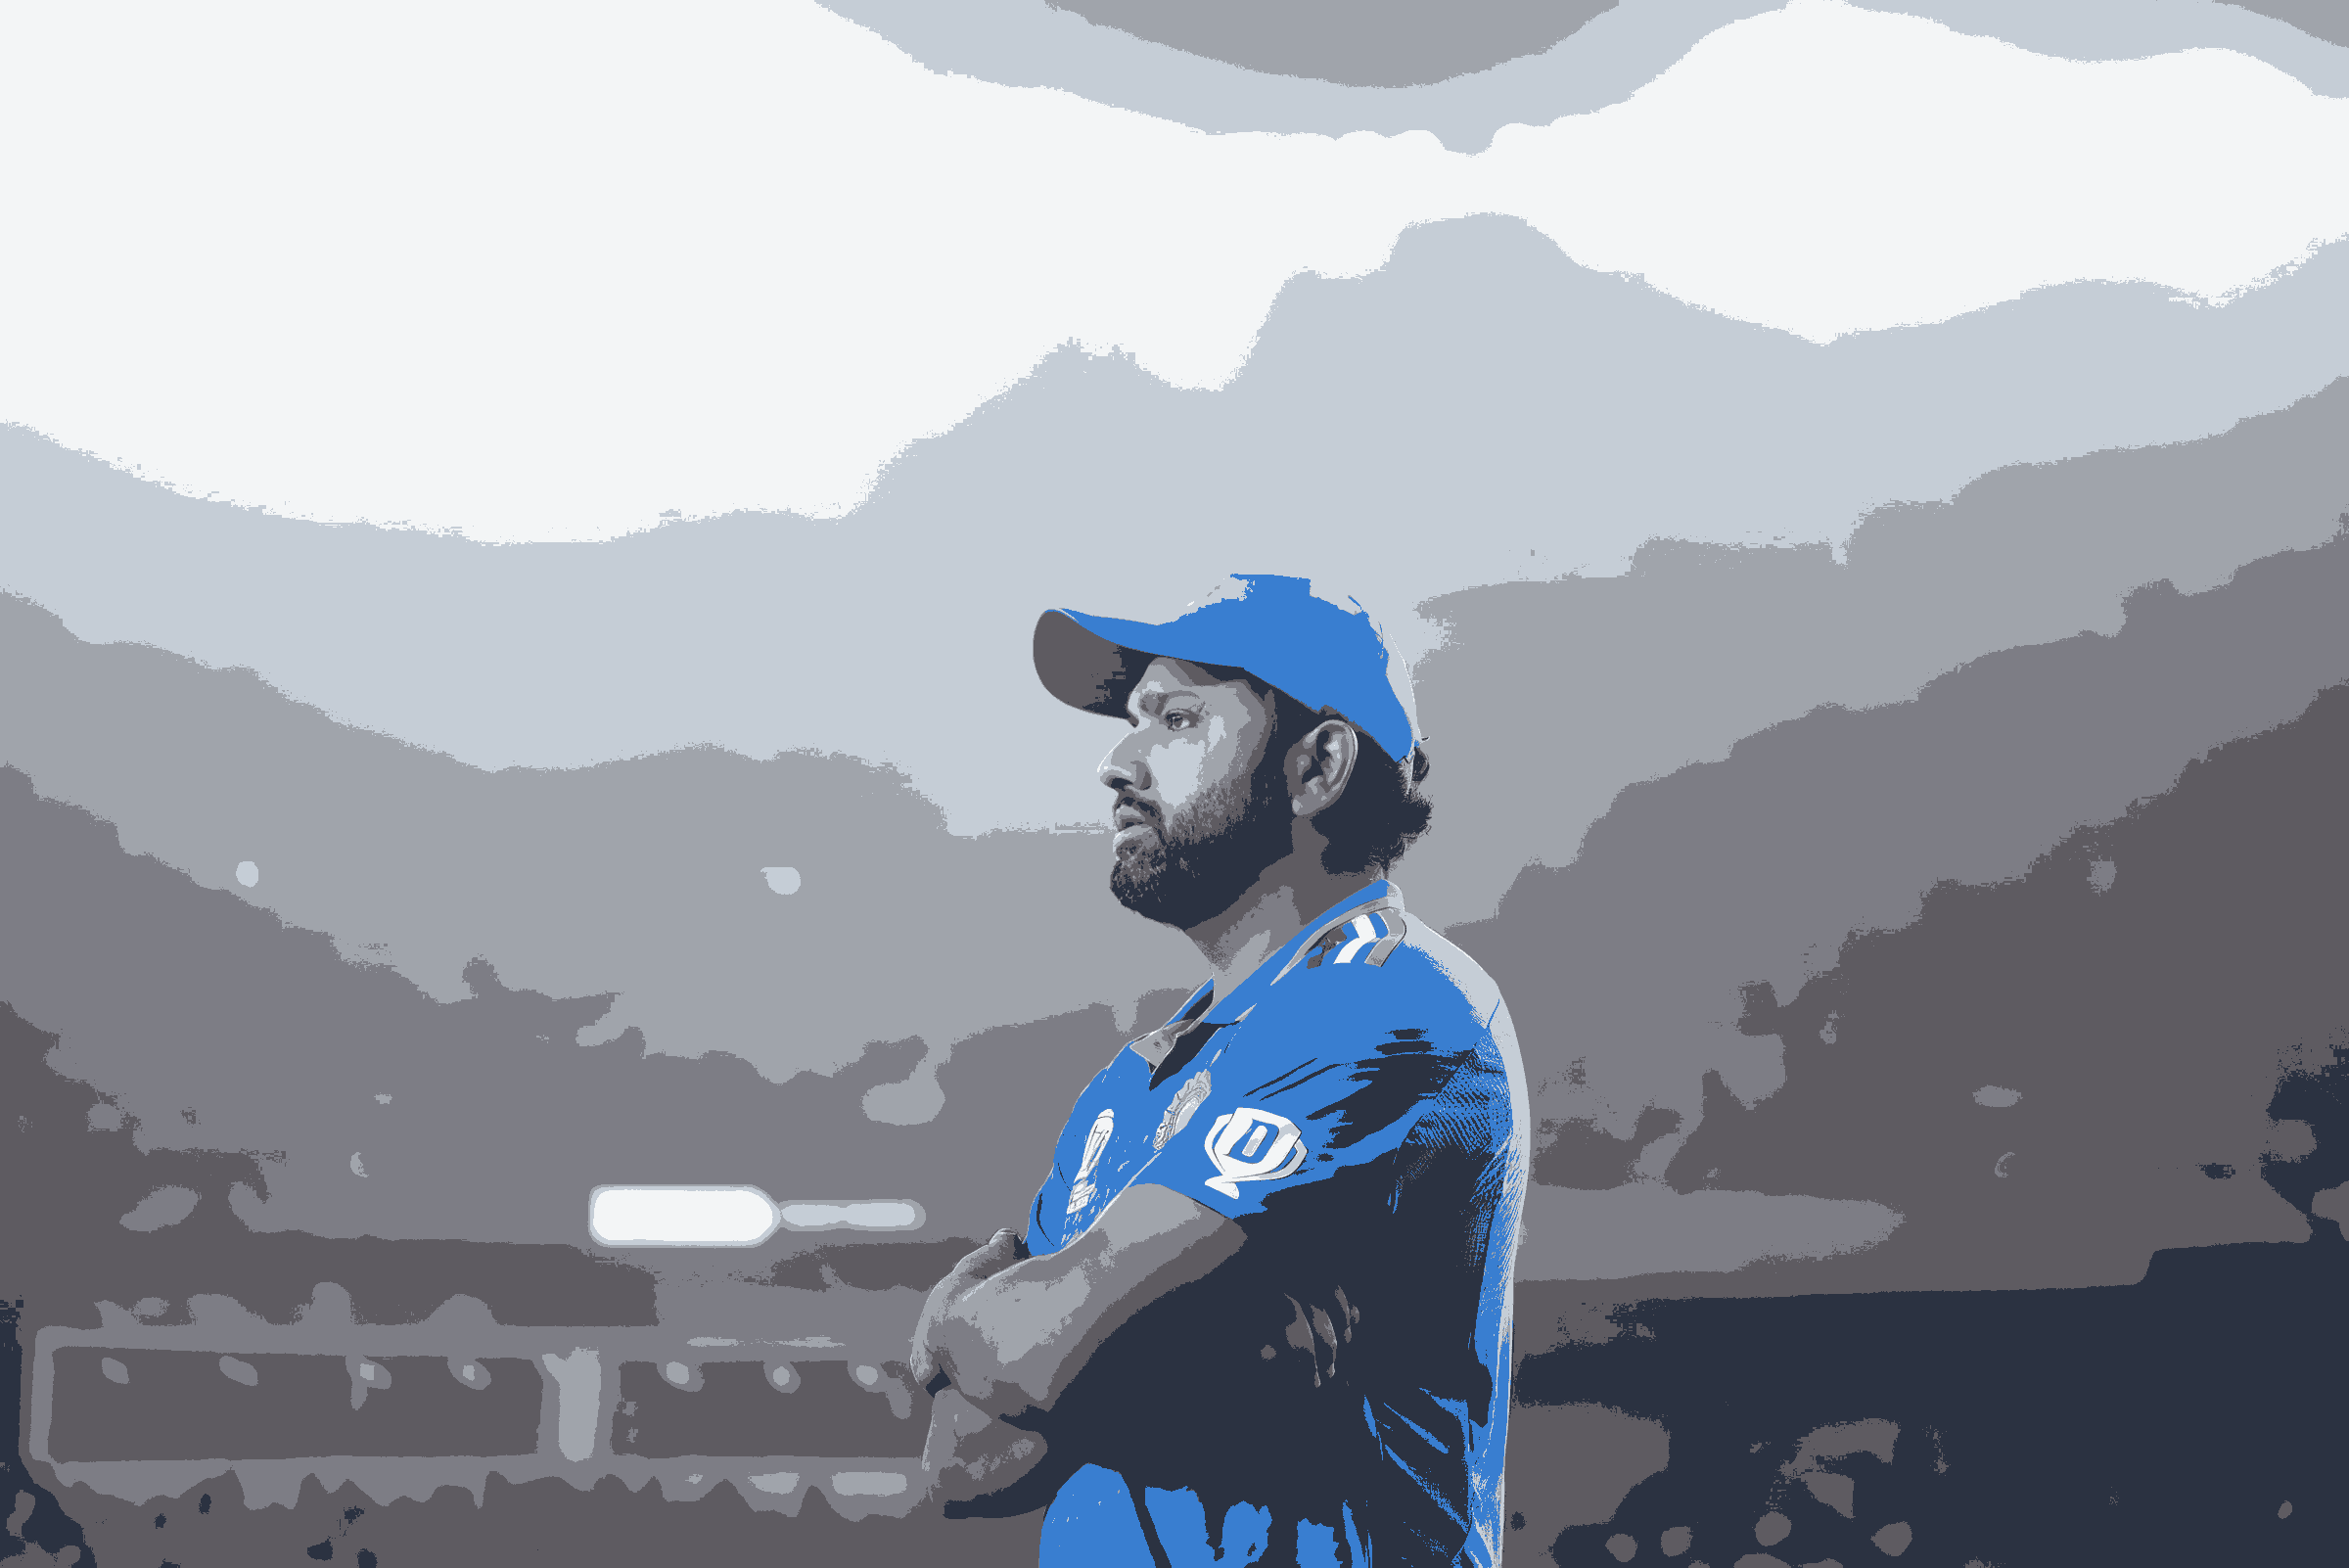

In [68]:
comp_img_captain

In [38]:
comp_img_captain.save('CAPTAIN SHARMA.jpg')

In [ ]:
# compressed Image = 161 KB
# Original Image = 1390 KB